<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise5_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use sklearn.neighbors.KNeighborsClassifier(n_neighbors=3) and sklearn.linear_model.LogisticRegression(penalty=’l2’, hyperparameter C set to 1.0) to fit separate predictive models based on 100 brain regions of interest (see ‘n_rois’ argument for datasets.fetch_atlas_schaefer_2018) based on the first 10, 20, 30, …, 80 of the first 100 structural brain scans to predict sex. Next, evaluate each fitted LogReg / kNN model on the unseen final 20% of the 100 structural brain scans and retrieve classification accuracy in XX.YY%. Please plot the classification accuracy on the test set (x axis=size of training data, y axis=prediction accuracy on test set, 2 lines with 2 colors for the 2 different prediction model classes).

In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 4.2 MB/s 


In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100) # we fix this to 100 rois
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females and 0 for males

/usr/local/lib/python3.7/dist-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)



Dataset created in /root/nilearn_data/oasis1



Downloaded 885891072 of 905208634 bytes (97.9%,    0.4s remaining) ...done. (20 seconds, 0 min)
Extracting data from /root/nilearn_data/oasis1/adcb228c7b26ed4f4fba93bd32bf8d97/archive_dartel.tgz..... done.
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)



Dataset created in /root/nilearn_data/schaefer_2018



 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# We prepare the models with the required parameters
logreg = LogisticRegression(max_iter=1e4, penalty = 'l2', C = 1, solver = 'saga')
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# We prepare the iterating variable (training set sizes)
split = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [ ]:
# We pre-allocate the variables we want to populate with accuracy scores
ridge_tr_acc = []
knn_tr_acc = []

ridge_test_acc = []
knn_test_acc = []

In [ ]:
# We're ready to plot
for x in split:

    X, y = input_variables, output_variable
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=(x), test_size=(0.2), shuffle=False)

    RidgeReg = logreg.fit(X_train,y_train) # We fit the ridge training model
    score_R = RidgeReg.score(X_train, y_train)
    score_R = np.multiply(score_R, 100)
    ridge_tr_acc.append(score_R) # We store the scores 
    print('Ridge training accuracy: %.2f' % ((score_R))) # We print the scores

    kNN = knn.fit(X_train,y_train) # We fit the kNN model
    score_k = kNN.score(X_train, y_train)
    score_k = np.multiply(score_k, 100) 
    knn_tr_acc.append(score_k) # We store the scores
    print('kNN training accuracy: %.2f' % ((score_k))) # We print the scores

    yhat_R = logreg.predict(X_test) # We use the ridge model to predict and store its prediction as "yhat"
    score_Rt = RidgeReg.score(X_test, y_test) 
    score_Rt = np.multiply(score_Rt, 100) 
    ridge_test_acc.append(score_Rt) # We store the scores
    print('Ridge test accuracy: %.2f' % ((score_Rt))) # We print the scores

    yhat_k = knn.predict(X_test) # We use the kNN model to predict and store its prediction as "yhat"
    score_k = kNN.score(X_test, y_test) 
    score_k = np.multiply(score_k, 100) 
    knn_test_acc.append(score_k) # We store the scores
    print('kNN test accuracy: %.2f' % ((score_k))) # We print the scores

Ridge training accuracy: 100.00
kNN training accuracy: 80.00
Ridge test accuracy: 65.00
kNN test accuracy: 60.00
Ridge training accuracy: 100.00
kNN training accuracy: 70.00
Ridge test accuracy: 75.00
kNN test accuracy: 60.00
Ridge training accuracy: 100.00
kNN training accuracy: 76.67
Ridge test accuracy: 65.00
kNN test accuracy: 45.00
Ridge training accuracy: 100.00
kNN training accuracy: 85.00
Ridge test accuracy: 45.00
kNN test accuracy: 40.00
Ridge training accuracy: 100.00
kNN training accuracy: 72.00
Ridge test accuracy: 75.00
kNN test accuracy: 60.00
Ridge training accuracy: 100.00
kNN training accuracy: 78.33
Ridge test accuracy: 85.00
kNN test accuracy: 85.00
Ridge training accuracy: 100.00
kNN training accuracy: 81.43
Ridge test accuracy: 70.00
kNN test accuracy: 75.00
Ridge training accuracy: 100.00
kNN training accuracy: 81.25
Ridge test accuracy: 55.00
kNN test accuracy: 65.00


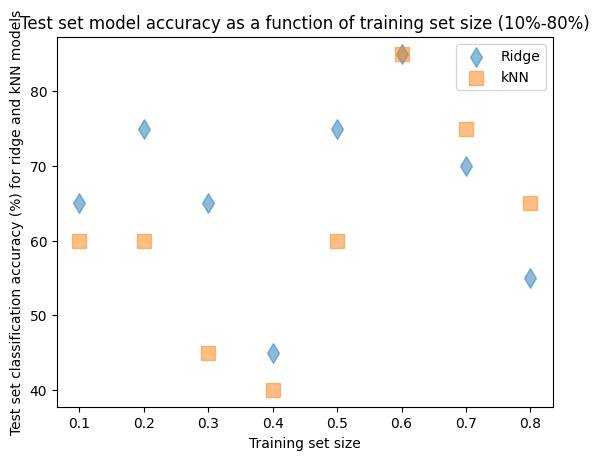

In [ ]:
# We're ready to plot
lab = ['Ridge', 'kNN']
plt.style.use("default")
plt.scatter(split,ridge_test_acc, s=100, alpha = 0.5, marker = 'd')
plt.scatter(split,knn_test_acc, s=100, alpha = 0.5, marker = 's')
plt.legend(labels=(lab))
plt.gca().set(
    title="Test set model accuracy as a function of training set size (10%-80%)",
    xlabel="Training set size",
    ylabel="Test set classification accuracy (%) for ridge and kNN models",
    xticks = (split)
)
plt.show()

After an inflection point of training sample size = 0.6, we get better and better predictions for kNN than with ridge. It seems that kNN does better when sample size increases.